# ML Model for Predicting Building  Damages from Earthquake 

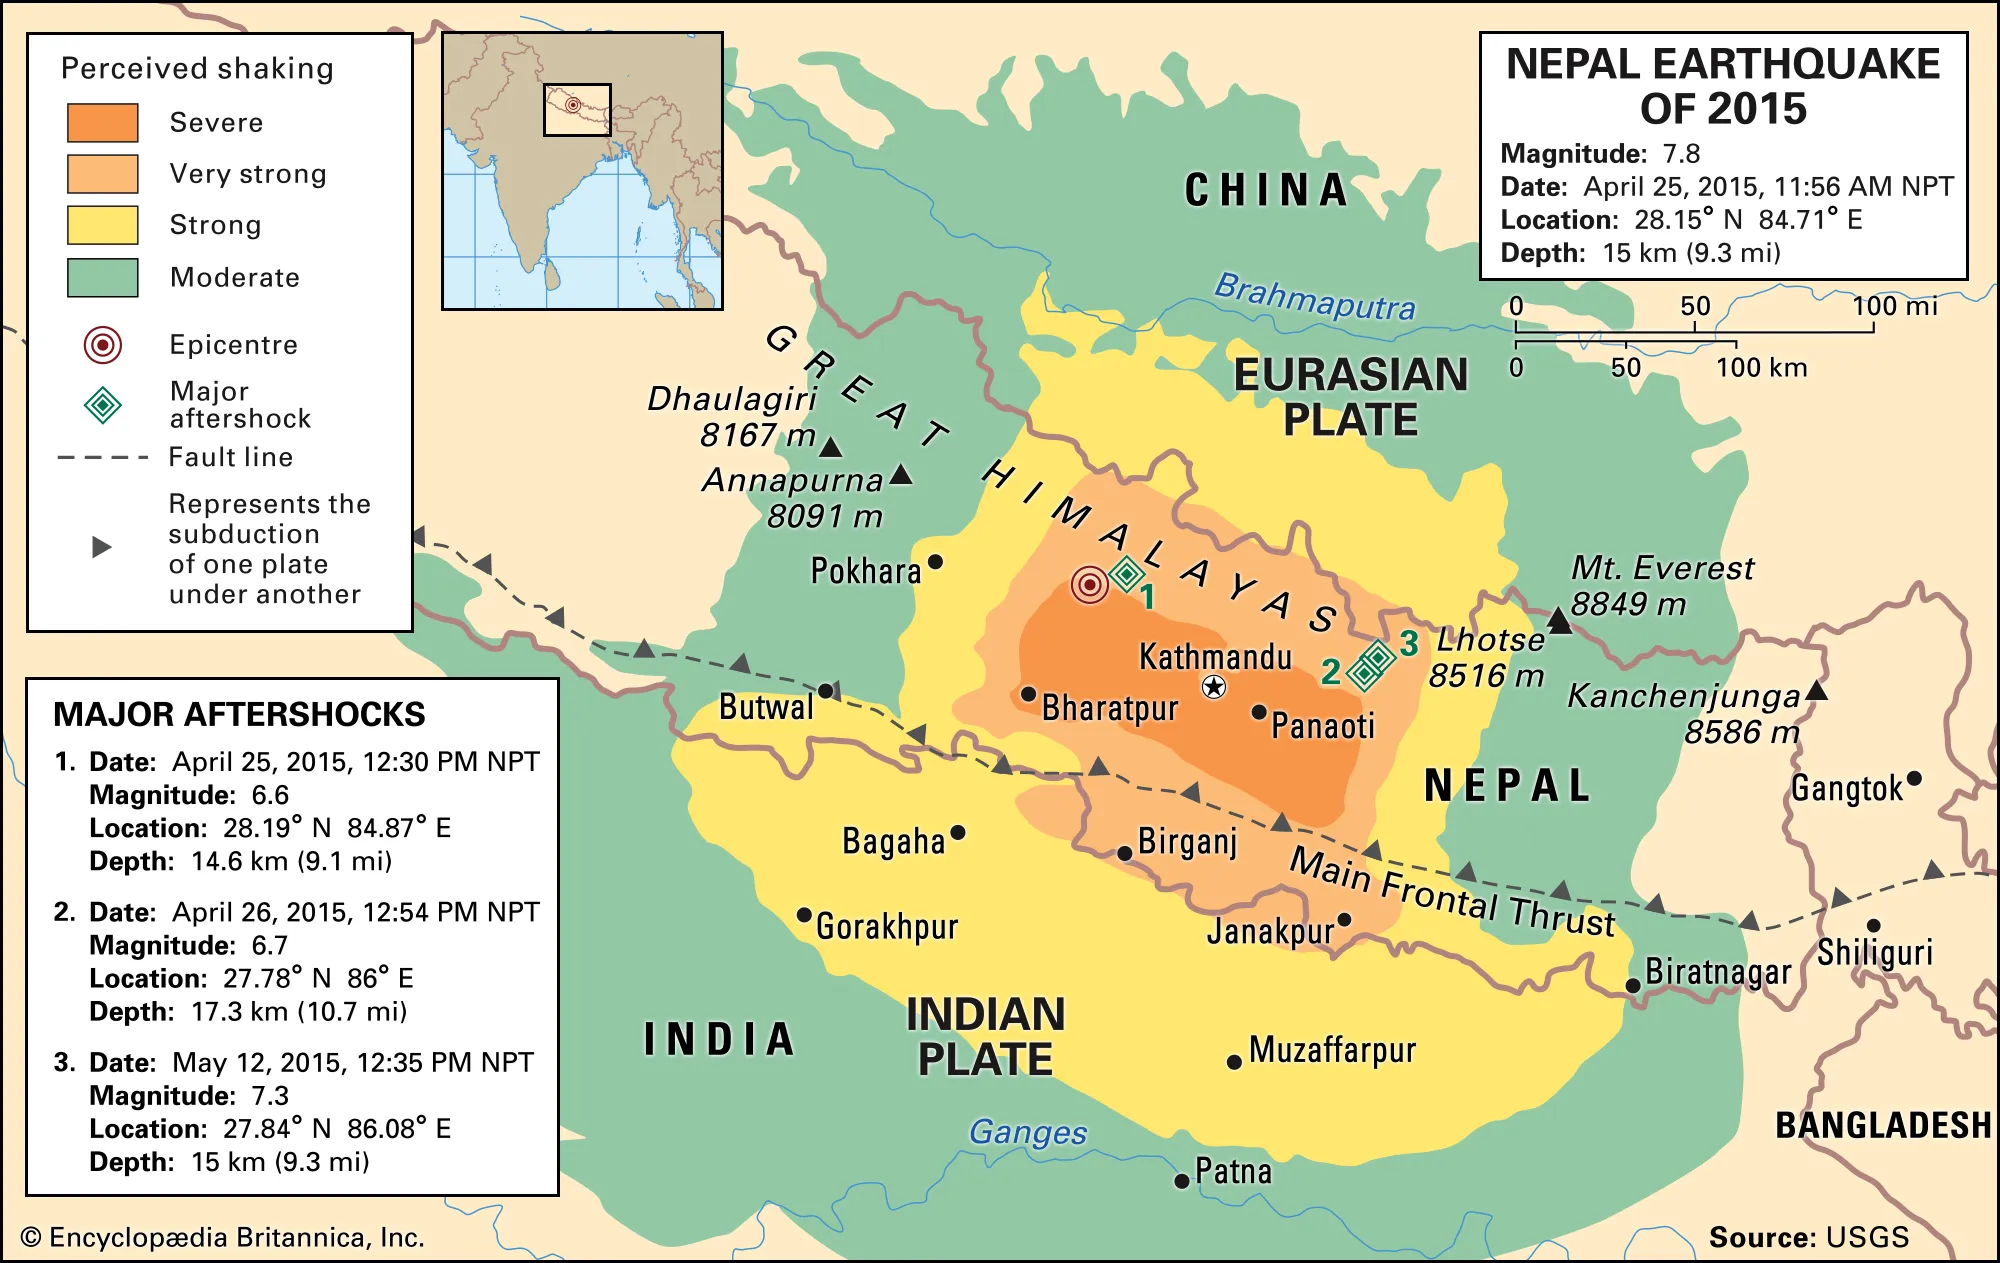

## Problem Statement

**This project is aimed at making use of machine learning to create a model that can predict whether a building has the structural capabilities to withstand an earthquake.**

## Data Collection

The data that is used in this project was extracted from the 2015 Nepal Open Data Portal, and is based on the earthquake that happened in the area of Gorkha,Nepal in 2015 and had a magnitude of 7.8<br>
Data Source: https://eq2015.npc.gov.np/#/

In [265]:
import pandas as pd

Raw_Data = pd.read_csv(r"C:\Users\APJ\OneDrive\Desktop\csv_building_structure.csv")

In [266]:
notreall = pd.read_csv(r"C:\Users\APJ\OneDrive\Desktop\csv_building_structure.csv")

In [267]:
notreall['district_id'].nunique()

11

In [268]:
notreall.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

In [269]:
notreall.shape

(762106, 27)

In [270]:
Raw_Data.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

In [271]:
Raw_Data['district_id'].value_counts()

24    98019
31    90994
30    89122
23    88741
36    78074
28    77148
20    68750
22    60639
21    58623
12    39352
29    12644
Name: district_id, dtype: int64

## Data Understanding

#### Feature Description
**count_floors_pre_eq** : The Number of floors building has before earthquake<br>
**age_building** : Age of the building<br>
**plinth_area_sq_ft** : Floor area of a building measured at the basement in square feet<br>
**height_ft_pre_eq** : Height of the building in feet before the earthquake<br>
**land_surface_condition** : Surface condition of the land,(Flat,Moderate Slope,Steep Slope)<br>
**foundation_type** : Type of foundation,(Mud mortar-Stone/Brick, Bamboo/Timber , Cement -Stone/Brick, Reinforced Concrete)<br> 
**roof_type** : Type of Roof,(Bamboo/Timber-Light Roof,Bamboo/Timber-Heavy Roof,RCC/RB/RBC)<br>
**ground_floor_type** : Type of ground floor,(Mud,Reinforced Concrete,Brick/Stone,Timber,Other)<br>
**other_floor_type** : Type of floor in floors except groundfloor and Roof,(Timber/Bamboo-Mud,Timber-Planck,NA,RCC/RB/RBC)<br>
**position** : Not Attached,Attached-1 side,Attached-2 side,Attached-3 side<br>
**plan_configuration** : Overall size and shape of the building<br>

The superstructure is the visible part of a building that sits above ground. It starts from the ground floor to the top of<br> 
the building<br>

**has_superstructure_adobe_mud** : Whether the superstructure was made of Adobe/Mud<br>
**has_superstructure_mud_mortar_stone** : Whether the superstructure was made of Mud Mortar and Stone<br>
**has_superstructure_stone_flag** : Whether the superstructure was made of stone<br>
**has_superstructure_cement_mortar_stone** : Whether the superstructure was made of Cement Mortar - Stone<br>
**has_superstructure_mud_mortar_brick** : Whether the superstructre was made of Mud Mortar - Brick.<br>
**has_superstructure_cement_mortar_brick** : Whether the superstructure was made of Cement Mortar and Brick<br>
**has_superstructure_timber** : Whether  the superstructure was made of Timber<br> 
**has_superstructure_bamboo** : Whether the superstructure was made of Bamboo<br>
**has_superstructure_rc_non_engineered** : Whether the superstructure was made of non-engineered reinforced concrete<br> 
**has_superstructure_rc_engineered** : Whether the superstructure was made of engineered reinforced concrete<br>
**has_superstructure_other** : Whether the superstructure was made of any other material<br>

**damage_grade** : The severity of damage expressed in grades 1 to 5.

In [272]:
Raw_Data.sample(5)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
148223,2.140000e+11,21,2106,210606,2,17,250.0,18,Moderate slope,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 4
251049,2.320000e+11,23,2303,230304,2,12,445.0,14,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,1,0,0,0,0,Grade 5
445088,2.820000e+11,28,2803,280301,1,27,438.0,9,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
497441,2.910000e+11,29,2903,290302,2,12,150.0,14,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
349700,2.430000e+11,24,2407,240702,1,80,228.0,10,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 3


In [273]:
Raw_Data.shape

(762106, 27)

The Data has 762,106 rows and 27 features

In [274]:
Raw_Data.dtypes

building_id                               float64
district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                                int64
plinth_area_sq_ft                         float64
height_ft_pre_eq                            int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


## Data Cleaning

In [275]:
# Lets import the common Libraries required before proceeding further,

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Handling Missing Data

In [276]:
Raw_Data.isnull().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                         28
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                 26
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

In [277]:
# There are missing data in 5 columns

##### Handling the missing value in plinth area column

In [278]:
# Visualizing the distribution of plinth area column,

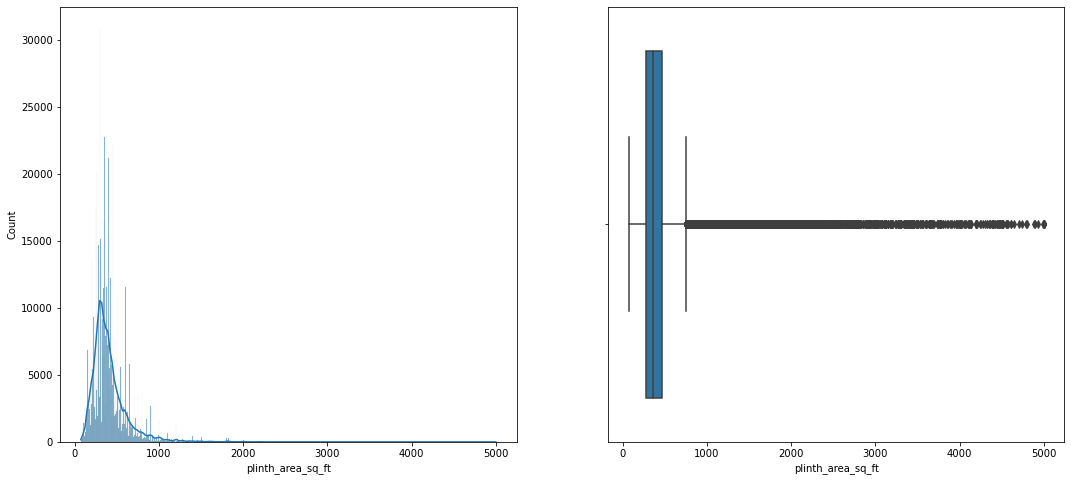

In [279]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
g1 = sns.histplot(x=Raw_Data['plinth_area_sq_ft'],kde=True,data=Raw_Data,ax=my_grid[0])
g2 = sns.boxplot(x=Raw_Data['plinth_area_sq_ft'],data=Raw_Data,ax=my_grid[1])

In [280]:
# The plint aree column has a lot of outliers, hence we will have to choose a method that will not have the affect of outliers

Text(0.5, 1.0, 'Variation of Plinth Area in different Roof Types')

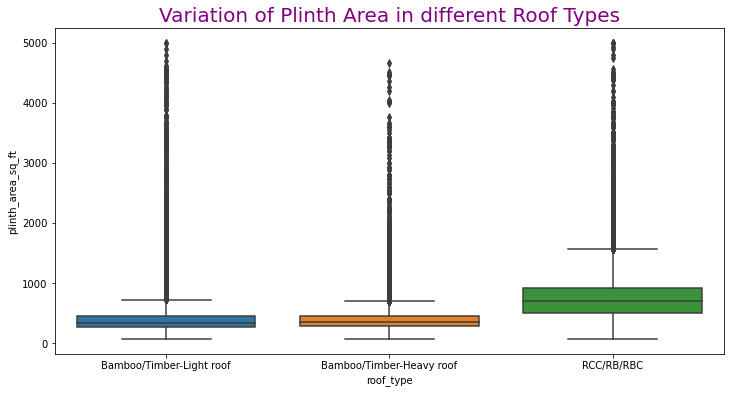

In [281]:
plt.figure(figsize=(12,6))
sns.boxplot(x=Raw_Data['roof_type'],y=Raw_Data['plinth_area_sq_ft'],data=Raw_Data)
plt.title("Variation of Plinth Area in different Roof Types",fontsize=20,color='purple')

In [282]:
# As we can see the type of roof of a building has a profound effect on the plint area
# Due to the presence of outliers, we will use median to find the replacement of null value

In [283]:
Raw_Data.groupby('roof_type').median()['plinth_area_sq_ft']

roof_type
Bamboo/Timber-Heavy roof    360.0
Bamboo/Timber-Light roof    345.0
RCC/RB/RBC                  700.0
Name: plinth_area_sq_ft, dtype: float64

In [284]:
def impute_plinth_area(cols):
    rtype=cols[0]
    plinth=cols[1]
    if pd.isnull(plinth):
        if rtype == "Bamboo/Timber-Heavy roof" :
            return 360
        elif rtype == "Bamboo/Timber-Light roof" :
            return 345
        elif rtype == "RCC/RB/RBC" :
            return 700
    else:
        return plinth

Raw_Data['plinth_area_sq_ft'] = Raw_Data[['roof_type','plinth_area_sq_ft']].apply(impute_plinth_area,axis=1)

###### Handling the Null values in Roof type column

Text(0.5, 1.0, 'Roof Types')

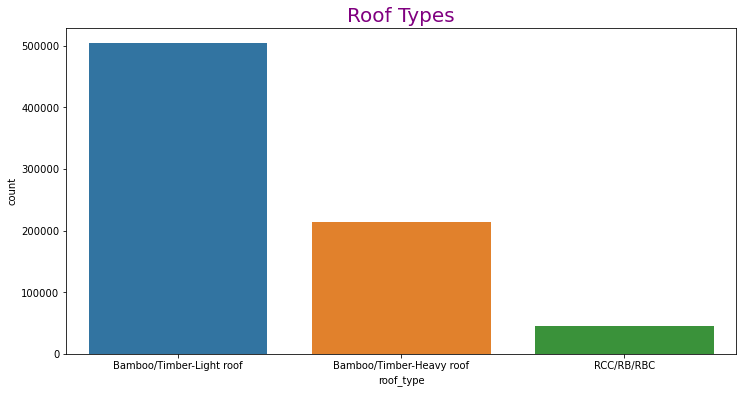

In [285]:
plt.figure(figsize=(12,6))
sns.countplot(x=Raw_Data['roof_type'],data=Raw_Data)
plt.title("Roof Types",fontsize=20,color='purple')

In [286]:
# As this is a ctegorical column, we can replace the missing values in this column using mode

In [287]:
Raw_Data['roof_type'].dtype

dtype('O')

In [288]:
Raw_Data['roof_type'] = Raw_Data['roof_type'].fillna(Raw_Data['roof_type'].mode()[0])

###### Handling Null Value in Position,Position Configuration and Damage Grade

In [289]:
# Lets see how much percentage of data is missing from these columns,

In [290]:
percent_missing = Raw_Data.isnull().sum() * 100 / len(Raw_Data)

In [291]:
percent_missing

building_id                               0.000000
district_id                               0.000000
vdcmun_id                                 0.000000
ward_id                                   0.000000
count_floors_pre_eq                       0.000000
age_building                              0.000000
plinth_area_sq_ft                         0.000000
height_ft_pre_eq                          0.000000
land_surface_condition                    0.000000
foundation_type                           0.000000
roof_type                                 0.000000
ground_floor_type                         0.000000
other_floor_type                          0.000000
position                                  0.000131
plan_configuration                        0.000131
has_superstructure_adobe_mud              0.000000
has_superstructure_mud_mortar_stone       0.000000
has_superstructure_stone_flag             0.000000
has_superstructure_cement_mortar_stone    0.000000
has_superstructure_mud_mortar_b

In [292]:
# As the percentage of missing values is really less in all the 3 columns, we can drop the rows containing NaN

Raw_Data.dropna(inplace=True)

In [293]:
# Lets verify whether all the NaN values have been dealt with,

Raw_Data.isnull().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [294]:
# We have sucessfully handled all the missing values in the data

### 2.Handling Duplicate Entries

In [295]:
# Let's see whether there is duplicated rows in our dataset

In [296]:
Raw_Data.duplicated().sum()

38570

In [297]:
# We can drop these duplicate entries from our data,

Raw_Data.drop_duplicates(inplace=True)

In [298]:
# Verifying whether all the duplicated entries have been droped,

Raw_Data.duplicated().sum()

0

## Exploratory Data Analysis

In [299]:
# Before proceeding with pre-processing and then modeling, we can use the power of visualization of extract insights from our
# data

In [300]:
Raw_Data.dtypes

building_id                               float64
district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                                int64
plinth_area_sq_ft                         float64
height_ft_pre_eq                            int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [301]:
Raw_Data['count_floors_pre_eq'].value_counts()

2    443678
3    155955
1    115867
4      6026
5      1554
6       331
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

<AxesSubplot:xlabel='count_floors_pre_eq', ylabel='count'>

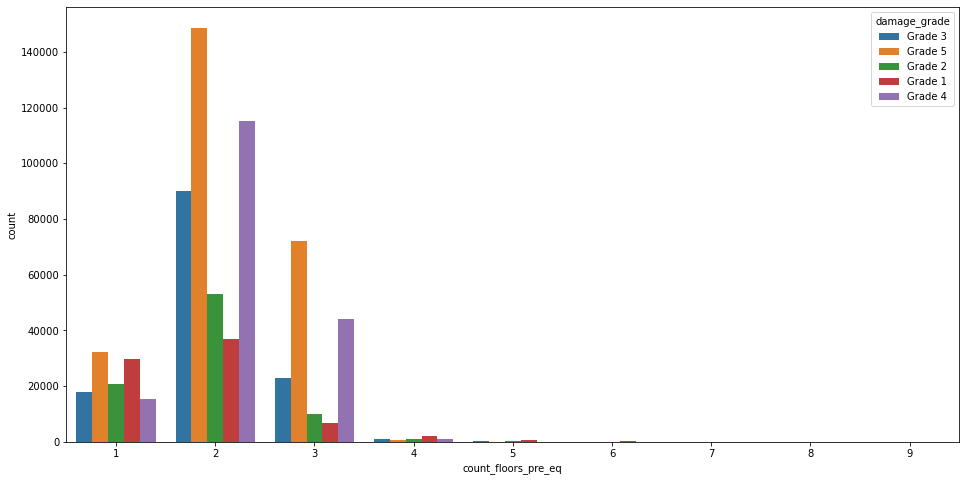

In [302]:
plt.figure(figsize=(16,8))
sns.countplot(x=Raw_Data['count_floors_pre_eq'],hue=Raw_Data['damage_grade'],data=Raw_Data)

## Handling Outliers

## 1.Count of Floors

In [303]:
#Not handling as all values are realistic

## Age of building

In [304]:
Q1=Raw_Data['age_building'].quantile(0.25)
Q3=Raw_Data['age_building'].quantile(0.75)
IQR=Q3-Q1
        
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)

In [305]:
Raw_Data['age_building']= np.where(Raw_Data['age_building']>UL,UL,np.where(Raw_Data['age_building']<LL,LL,
                                                                           Raw_Data['age_building']))

<AxesSubplot:ylabel='age_building'>

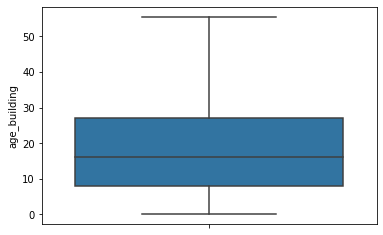

In [306]:
sns.boxplot(y=Raw_Data['age_building'],data=Raw_Data)

In [307]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Height and Plinth Area

				 Distribution of Plinth Area & Height


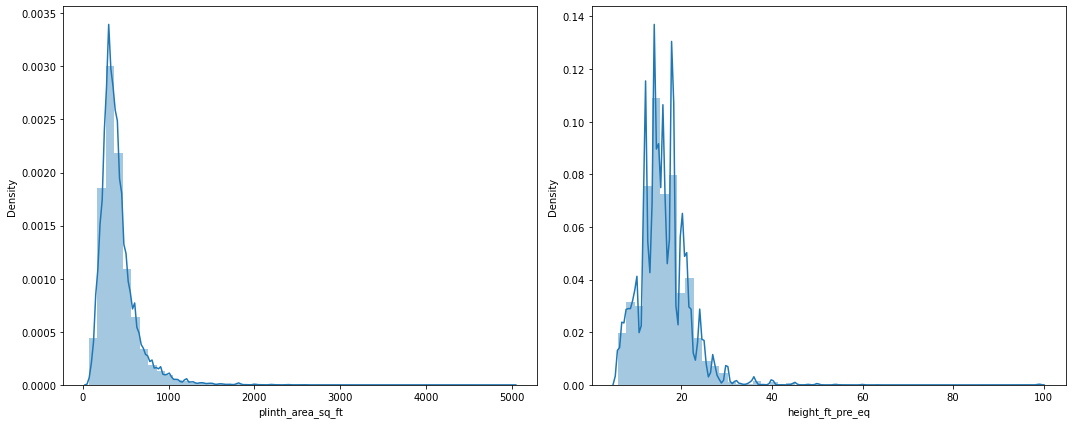

In [308]:
print("\t\t\t\t Distribution of Plinth Area & Height")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(Raw_Data['plinth_area_sq_ft'],kde=True)
plt.subplot(1,2,2)
sns.distplot(Raw_Data['height_ft_pre_eq'],kde=True)
plt.tight_layout()

				Plinth Area & Height after log tranformation


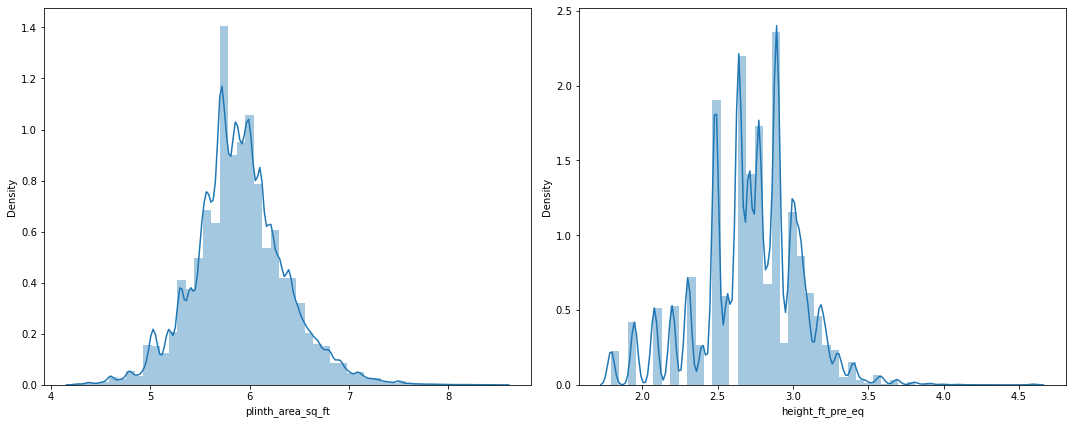

In [309]:
# Both These columns are heavily right skewed
# By using log transformation we can modify these columns to normally distributed columns,

print("\t\t\t\tPlinth Area & Height after log tranformation")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Raw_Data['plinth_area_sq_ft'] = np.log(Raw_Data['plinth_area_sq_ft'])
sns.distplot(Raw_Data['plinth_area_sq_ft'],kde=True)
plt.subplot(1,2,2)
Raw_Data['height_ft_pre_eq'] = np.log(Raw_Data['height_ft_pre_eq'])
sns.distplot(Raw_Data['height_ft_pre_eq'],kde=True)
plt.tight_layout()

# Feature Reduction

In [310]:
Raw_Data.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

In [311]:
## We shall drop the id columns,

Raw_Data.drop(['building_id','vdcmun_id','ward_id'],axis=1,inplace=True)

In [312]:
## Lets see the correlation matrix

<AxesSubplot:>

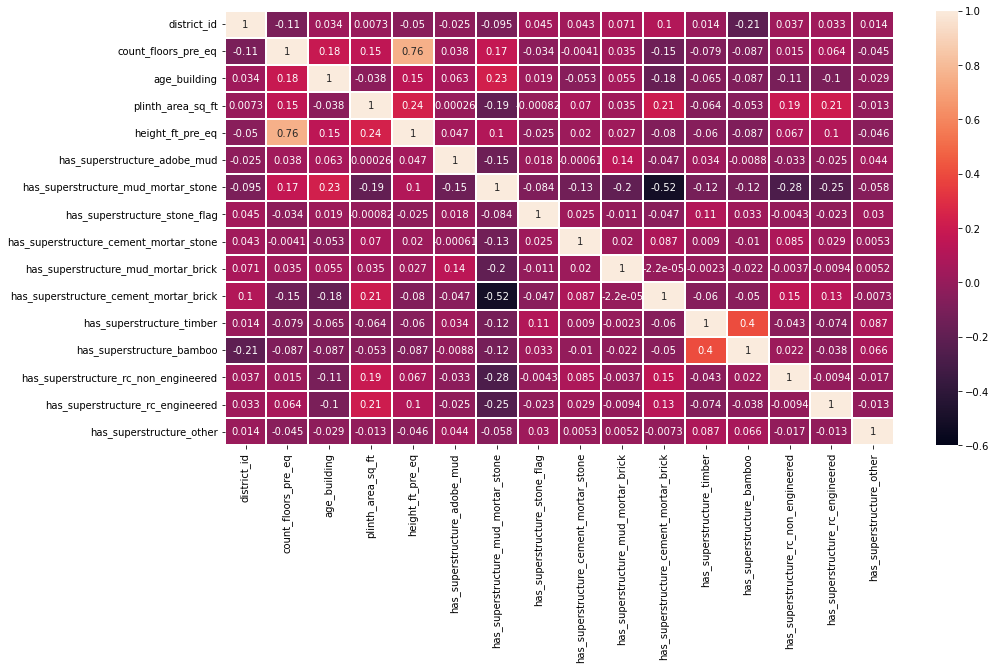

In [313]:
plt.figure(figsize=(15,8))
sns.heatmap(data=Raw_Data.corr(),annot=True,linewidths=0.3,vmin=-0.6,vmax=1.0,cbar=True)

In [314]:
# Number of floors and height of the building has a high correlation, we are dropiing height of the building feature

#Raw_Data.drop(['height_ft_pre_eq'],axis=1,inplace=True)

In [315]:
Raw_Data.columns

Index(['district_id', 'count_floors_pre_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

### Things to do before modeling

> 1. Convert obj to numerical using One hot and label encoding
2. Apply a standardisation/normalization technique
3. Split data to X and y
4. Split data to train and test
5. Modeling with balancing

In [316]:
checkpoint1 = Raw_Data.copy()

In [317]:
checkpoint1['damage_grade'].value_counts()

Grade 5    253777
Grade 4    175797
Grade 3    131894
Grade 2     85458
Grade 1     76598
Name: damage_grade, dtype: int64

## Trying to improve the model's accuracy

In [318]:
Raw_Data.columns

Index(['district_id', 'count_floors_pre_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

In [319]:
Raw_Data.drop(['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],axis=1,inplace=True)

## Label encoding the taret variable

In [320]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Raw_Data['damage_grade'] = le.fit_transform(Raw_Data['damage_grade'])
print(le.classes_)

['Grade 1' 'Grade 2' 'Grade 3' 'Grade 4' 'Grade 5']


In [321]:
Raw_Data['damage_grade'].value_counts()

4    253777
3    175797
2    131894
1     85458
0     76598
Name: damage_grade, dtype: int64

## CatBoost Encoding other categorical columns

In [322]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [323]:
# Lets take all the other categorical columns in a dataframe

In [324]:
X = Raw_Data.drop(['damage_grade'],axis=1)

In [325]:
y= Raw_Data['damage_grade']

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=34,stratify=y)

In [328]:
import category_encoders as ce

In [329]:
cbe_encoder = ce.cat_boost.CatBoostEncoder()

In [330]:
cbe_encoder.fit(X_train,y_train)
train_cbe = cbe_encoder.transform(X_train)

In [331]:
test_cbe = cbe_encoder.transform(X_test)

In [332]:
X_train = train_cbe

In [333]:
X_test = test_cbe

In [334]:
X_test

,district_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration
358657,24,1,17.0,6.204558,2.564949,2.597829,2.893875,2.720270,2.807581,1.993480,2.599906,2.631999
445681,28,3,15.0,6.131226,2.708050,2.597829,2.893875,2.720270,2.807581,2.870363,2.774373,2.631999
43282,20,1,30.0,6.016157,2.079442,2.679782,2.893875,2.720270,2.807581,1.993480,2.599906,2.631999
334467,24,2,15.0,6.298949,2.708050,2.597829,2.893875,2.720270,2.807581,2.870363,2.599906,2.631999
512544,30,3,20.0,5.886104,2.772589,2.597829,2.893875,2.720270,2.807581,2.870363,2.599906,2.631999
...,...,...,...,...,...,...,...,...,...,...,...,...
336038,24,2,19.0,5.986452,3.091042,2.679782,2.893875,2.720270,2.807581,2.870363,2.599906,2.631999
312880,23,3,22.0,5.857933,2.890372,2.597829,2.893875,2.776786,2.807581,2.870363,2.599906,2.631999
186258,22,3,1.0,5.843544,2.708050,2.597829,2.893875,2.720270,2.743718,2.870363,2.599906,2.631999
320739,24,2,17.0,5.683580,2.708050,2.679782,2.893875,2.720270,2.807581,2.870363,2.774373,2.631999


## Min Max Scaling

In [335]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [336]:
X_train = scaler.fit_transform(X_train)


In [337]:
X_test = scaler.fit_transform(X_test)


In [338]:
X_train = pd.DataFrame(X_train)

In [339]:
X_test = pd.DataFrame(X_test)

## One Hot encoding the other object type features

## Balancing with class weight

In [340]:
from sklearn.utils import class_weight
true_weights = class_weight.compute_class_weight('balanced',
                                                np.unique(Raw_Data['damage_grade']),
                                                Raw_Data['damage_grade'])

In [341]:
true_weights

array([1.88914593, 1.69328559, 1.09712951, 0.82313578, 0.57020455])

In [342]:
new_weights = {0:1.87,1:1.68,2:1.09,3:0.82,4:0.57}

## Logistic Regression

In [248]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight=new_weights)
LR.fit(X_train,y_train)

C:\Users\APJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1.87, 1: 1.68, 2: 1.09, 3: 0.82, 4: 0.57})

In [249]:
y_predicted = LR.predict(X_test)

In [250]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
# Metrics of the model
print("accuracy score is ",accuracy_score(y_predicted,y_test))
print("f1 score is",f1_score(y_predicted,y_test,average='micro'))

accuracy score is  0.36549217259902883
f1 score is 0.3654921725990289


## Balancing with class weight simple method

In [217]:
heights = final_df['damage_grade'].value_counts()/len(final_df)

In [214]:
weights.dtype

dtype('float64')

## Random Forest

In [343]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight=new_weights)
forest.fit(X_train,y_train)
y_predicted = forest.predict(X_test)

In [344]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test,average='micro'))

accuracy score is  0.44071169917717845
f1 score is 0.44071169917717845


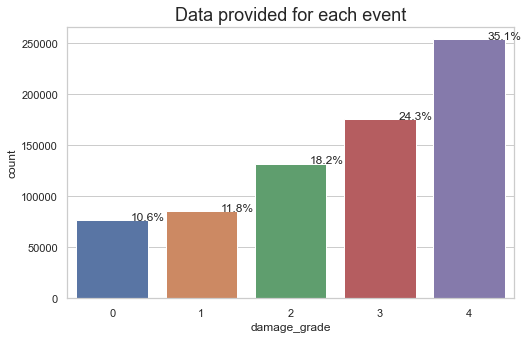

In [161]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(Raw_Data))
ax = sns.countplot(x="damage_grade", data=Raw_Data)
plt.title('Data provided for each event', fontsize=18)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


In [162]:
Raw_Data['damage_grade'].value_counts()

4    253777
3    175797
2    131894
1     85458
0     76598
Name: damage_grade, dtype: int64

In [163]:
Raw_Data.columns

Index(['count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')